In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv("production dataset.csv",index_col="Date",parse_dates=True)
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [5]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [7]:
df.loc["1965"]

,Production
Date,
1965-01-01,658
1965-02-01,622
1965-03-01,709
1965-04-01,722
1965-05-01,782
1965-06-01,756
1965-07-01,702
1965-08-01,653
1965-09-01,615


In [8]:
df.loc["1965"].mean()

Production    673.083333
dtype: float64

In [9]:
avg_prod = []
for i in range(1962,1976):
    avg_prod.append(df.loc[f"{i}"].mean()[0])

In [10]:
avg_prod

[615.75,
 630.0,
 658.75,
 673.0833333333334,
 708.75,
 732.9166666666666,
 748.8333333333334,
 763.9166666666666,
 782.0,
 834.0833333333334,
 854.1666666666666,
 842.5833333333334,
 858.4166666666666,
 862.6666666666666]

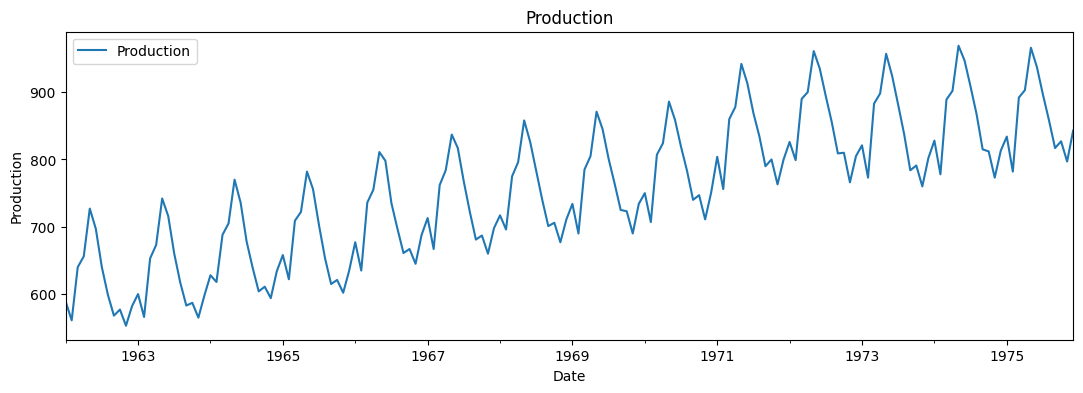

In [11]:
df.plot(figsize=(13,4),title="Production",ylabel="Production")
plt.show()

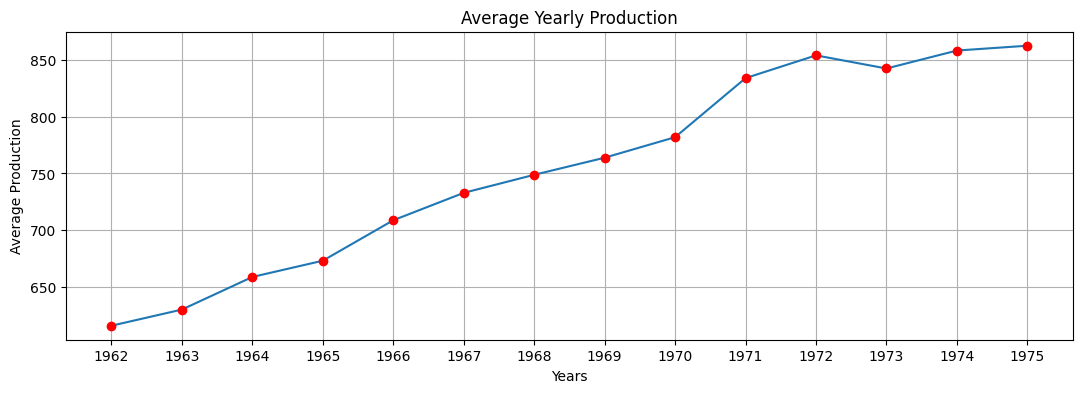

In [12]:
plt.figure(figsize=(13,4))
plt.plot(range(1962,1976),avg_prod)
plt.plot(range(1962,1976),avg_prod,"ro")
plt.xticks(range(1962,1976))
plt.title("Average Yearly Production")
plt.xlabel("Years")
plt.ylabel("Average Production")
plt.grid()
plt.show()

In [13]:
result = seasonal_decompose(df)

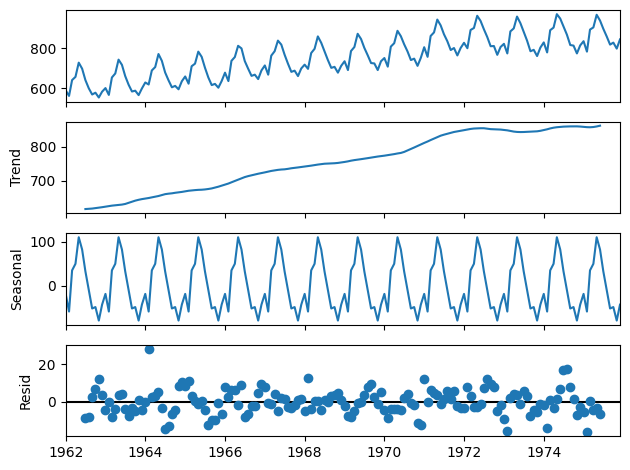

In [14]:
result.plot();

In [15]:
len(df)

168

In [16]:
train = df.iloc[:len(df)-12]
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [17]:
test = df.iloc[len(df)-12:]
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(train)

MinMaxScaler()

In [20]:
scaled_train=scaler.transform(train)

In [21]:
scaled_test=scaler.transform(test)

In [22]:
scaled_train

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [23]:
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [24]:
generator = TimeseriesGenerator(scaled_train,scaled_train,length=12,batch_size=1)

In [25]:
generator

In [26]:
generator[0]

(array([[[0.08653846],
         [0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154]]]),
 array([[0.11298077]]))

In [27]:
generator[1]

(array([[[0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154],
         [0.11298077]]]),
 array([[0.03125]]))

In [28]:
a,b=generator[1]

In [29]:
print(a.shape)

(1, 12, 1)


In [30]:
print(b.shape)

(1, 1)


In [31]:
model = Sequential([
    LSTM(2000,activation="relu",input_shape=((12,1))),
    Dense(1)
])

In [32]:
model.compile(optimizer="adam",loss="mse")

In [33]:
model.fit(generator,epochs=20)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 102s 690ms/step - loss: 0.1369
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 102s 708ms/step - loss: 0.0188
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 104s 719ms/step - loss: 0.0067
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 104s 720ms/step - loss: 0.0048
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 102s 708ms/step - loss: 0.0045
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 96s 668ms/step - loss: 0.0030
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 94s 653ms/step - loss: 0.0037
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 93s 648ms/step - loss: 0.0024
Epoch 9/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 108s 749ms/step - loss: 0.0021
Epoch 10/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 109s 757ms/step - loss: 0.0026
Epoch 11/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 107s 739ms/step - loss: 0.0024
Epoch 12/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 109s 754ms/step - loss: 0.0021
Epoch 13/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 108s 747ms/step - loss: 0.0022
Epoch 14/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 113s 784ms/step - loss: 0.0026
Epoc

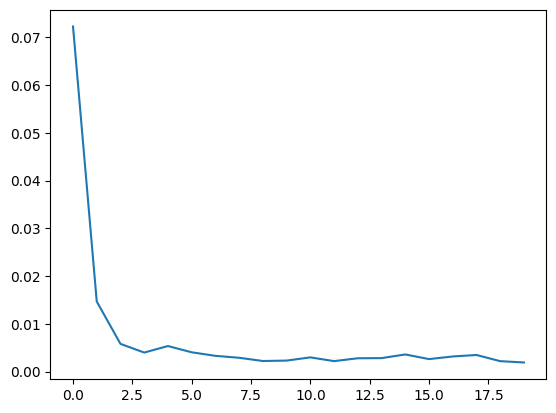

In [35]:
plt.plot(model.history.history["loss"])
plt.show()

In [36]:
last_train_batch=scaled_train[-12:]

In [37]:
last_train_batch=last_train_batch.reshape((1,12,1))

In [38]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


array([[0.6875437]], dtype=float32)

In [39]:
scaled_test[0]

array([0.67548077])

In [40]:
model.predict(last_train_batch)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([0.6875437], dtype=float32)

In [41]:
test_pred=[]

In [44]:
first_eval_batch=scaled_train[-12:]
current_batch=first_eval_batch.reshape((1,12,1))

In [45]:
for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_pred.append(current_pred)

    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [46]:
test_pred

[array([0.6875437], dtype=float32),
 array([0.6006585], dtype=float32),
 array([0.82467854], dtype=float32),
 array([0.87382865], dtype=float32),
 array([1.010054], dtype=float32),
 array([0.97732365], dtype=float32),
 array([0.891961], dtype=float32),
 array([0.7965557], dtype=float32),
 array([0.68029344], dtype=float32),
 array([0.6609253], dtype=float32),
 array([0.5847092], dtype=float32),
 array([0.65591115], dtype=float32)]

In [47]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [48]:
true_pred=scaler.inverse_transform(test_pred)
true_pred

array([[839.01817513],
       [802.87392616],
       [896.06627274],
       [916.5127182 ],
       [973.18246078],
       [959.56663895],
       [924.05576706],
       [884.36717033],
       [836.00207138],
       [827.94493675],
       [796.23903847],
       [825.8590374 ]])

In [53]:
test["Predicted_Prod"]=true_pred

In [60]:
true_pred

array([[839.01817513],
       [802.87392616],
       [896.06627274],
       [916.5127182 ],
       [973.18246078],
       [959.56663895],
       [924.05576706],
       [884.36717033],
       [836.00207138],
       [827.94493675],
       [796.23903847],
       [825.8590374 ]])

<Axes: xlabel='Date'>

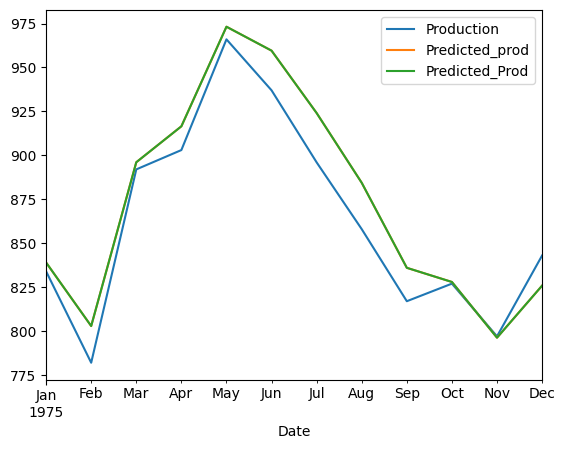

In [61]:
test.plot()

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
rmse=np.sqrt(mean_squared_error(test["Production"],test["Predicted_Prod"]))
rmse

16.73217698201417

In [57]:
test.mean()

Production        862.666667
Predicted_prod    873.474018
Predicted_Prod    873.474018
dtype: float64

In [58]:
lower=test["Production"].mean()-rmse
upper=test["Production"].mean()+rmse

In [59]:
lower,upper

(845.9344896846525, 879.3988436486808)